This script implements the MonteCarlo first visit algorithm for optimal policy. It was intended to use the exploring start technique but due to the <br>
reward mechanism it was not improving. To tackle this problem it was implemented an epsilon greedy strategy with decreasing value of epsilon till a minimum is <br>
reached. After the training phase then the policy is deterministic<br><br>

Edit: I read the pseudo code wrongly but this works with the exploration mechanism. Due to the construction of the frozen lake game, it is not possible to use the exploring start since the player will always start from the top left corner

In [1]:
import gym
from collections import defaultdict
import numpy as np
import random
import time
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True)

policy=np.zeros(env.observation_space.n)

def Average(lst): 
    return sum(lst) / len(lst)

def argmax_over_Q(Q, state, actions):
    max=float('-inf')
    for action in actions:
        if Q[state,action]>max:
            max=Q[state,action]
            chosen_action=action
            
    return chosen_action
        


In [2]:
def MC_ES_for_optimal_policy(env, policy, number_of_episodes, discount_factor=1, epsilon=0.05):
    Q = np.zeros((env.observation_space.n, env.action_space.n), dtype=float)
    returns=defaultdict(list)
    exploration_factor=0.98
    graph=np.array([])
    
    for episode in range(number_of_episodes):
        observation, info = env.reset() #this is my S0
        action=env.action_space.sample() #this is my A0
        
        states_actions=[]
        rewards=[]
        
        states_actions.append((observation,0))
        rewards.append(0)
        
        
        while True:
            observation, reward, terminated, truncated, info = env.step(action)
            if random.random()<=exploration_factor:
                action=env.action_space.sample()
            else:
                action=int(policy[observation])
                
            states_actions.append((int(observation), int(action)))
            rewards.append(reward)
            
            if terminated or truncated:
                break
        
        G = 0
        T = len(states_actions)-1
        for i in range(T):
            t=T-1-i
            G=discount_factor*G+rewards[t+1]
            if not (states_actions[t] in states_actions[:t]):
                    returns[states_actions[t]].append(G)
                    Q[states_actions[t]]=Average(returns[states_actions[t]])
                    policy[states_actions[t][0]]=argmax_over_Q(Q, states_actions[t][0], range(env.action_space.n))
        
        if exploration_factor>epsilon:
            exploration_factor=exploration_factor*0.99995
        else:
            exploration_factor=epsilon
        
        graph=np.append(graph, np.array(exploration_factor))
        
    plt.plot(graph)
    plt.show()
    return policy    

C:\Users\miche\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


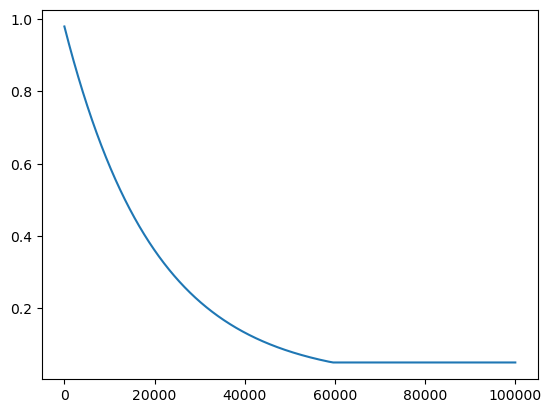

In [3]:
policy = MC_ES_for_optimal_policy(env, policy, 100000, 1)

In [4]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True, render_mode="human")
observation , _ = env.reset()
time.sleep(1)
while True:
    observation, reward, terminated, truncated, info = env.step(int(policy[observation]))

    if terminated or truncated:
        observation , _ = env.reset()

KeyboardInterrupt: 

In [5]:
env.close()

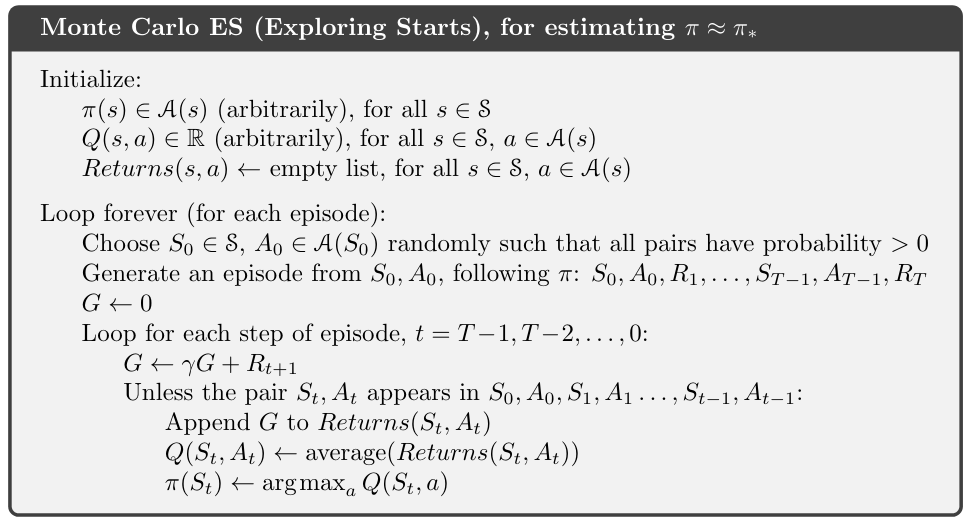